In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 38BD-BC20

 Directory of C:\Users\vinod kumar N\DATA SCEINCE\Assignment 7th

03/09/2023  10:10 AM    <DIR>          .
03/09/2023  10:09 AM    <DIR>          ..
03/09/2023  10:10 AM    <DIR>          .ipynb_checkpoints
03/09/2023  10:08 AM           218,780 Clustering (crime_data).ipynb
03/09/2023  09:44 AM             1,328 crime_data.csv
03/09/2023  09:44 AM           268,963 EastWestAirlines.xlsx
03/09/2023  09:45 AM             1,560 Problem_Statement(Airlines).txt
03/09/2023  09:45 AM               389 ProblemSatement(crime_data).txt
03/09/2023  10:10 AM                72 Untitled.ipynb
               6 File(s)        491,092 bytes
               3 Dir(s)  413,028,118,528 bytes free


In [3]:
df = pd.ExcelFile('EastWestAirlines.xlsx')
# Now you can list all sheets in the file
df.sheet_names

['Description', 'data']

In [4]:
# to read just one sheet to dataframe:
air = pd.read_excel('EastWestAirlines.xlsx', sheet_name="data")

In [5]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
#Renaming the columns
air=air.rename({'ID#':'ID','Award?':'Award'},axis=1)

In [10]:
air.head(2)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


In [9]:
air1=air.iloc[:,1:]
air1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


In [12]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [13]:
# Normalized data frame (considering the numerical part of data)
air1_norm = norm_func(air)
air1_norm

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


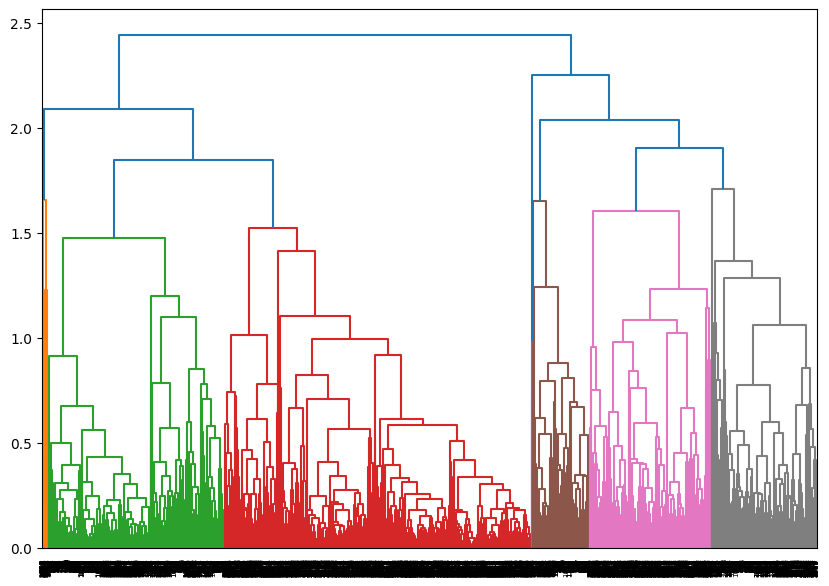

In [14]:
#create dendrogram
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(air1_norm, method='complete'))

In [15]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [16]:
y=pd.DataFrame(hclusters.fit_predict(air1_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    912
4    884
2    838
1    796
3    569
Name: clustersid, dtype: int64

In [17]:
 # Adding clusters to dataset
air['hclusters']=hclusters.labels_
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [18]:
 # Plotting barplot using groupby method to get visualization of how many row no in each cluster

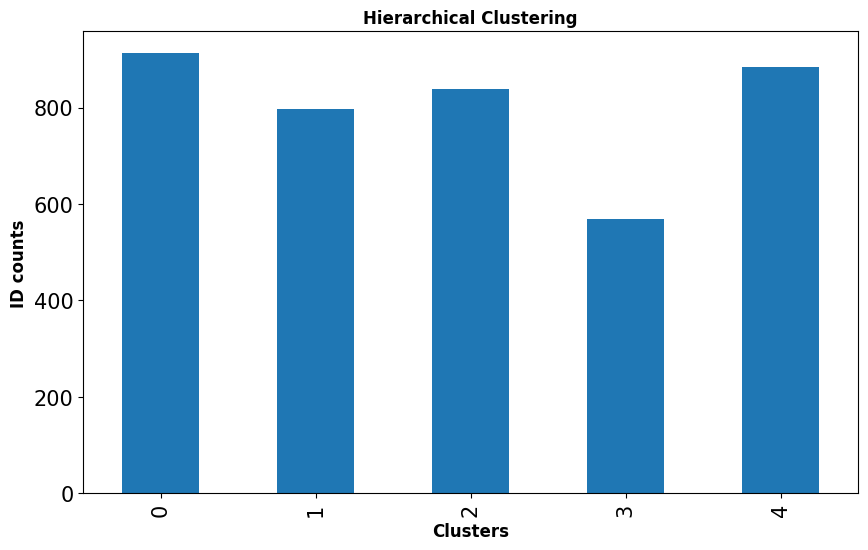

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
air.groupby(['hclusters']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [20]:
air.groupby('hclusters').agg(['mean']).reset_index()

,hclusters,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1647.451754,103377.721491,221.676535,3.691886,1.001096,1.023026,41796.067982,19.587719,674.711623,2.025219,4796.646930,1.0
1,1,1879.143216,106682.484925,72.143216,3.227387,1.001256,1.026382,26773.806533,16.486181,196.809045,0.551508,4363.711055,0.0
2,2,3328.994033,31061.826969,108.257757,1.000000,1.000000,1.000000,2479.093079,5.661098,277.115752,0.769690,1784.566826,0.0
3,3,1902.894552,86915.794376,269.880492,1.010545,1.038664,1.010545,8244.121265,9.683656,1150.478032,3.520211,4350.043937,1.0
4,4,1342.245475,44849.627828,81.942308,1.003394,1.038462,1.001131,2674.084842,5.831448,204.661765,0.632353,5261.788462,0.0


In [21]:
# silhouette_score of AgglomerativeClustering
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(air1_norm, hclusters.labels_)
sil_score

0.3712758705361222

# K-MEANS CLUSTERING

In [22]:
from sklearn.cluster import KMeans

In [23]:
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(air1_norm)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

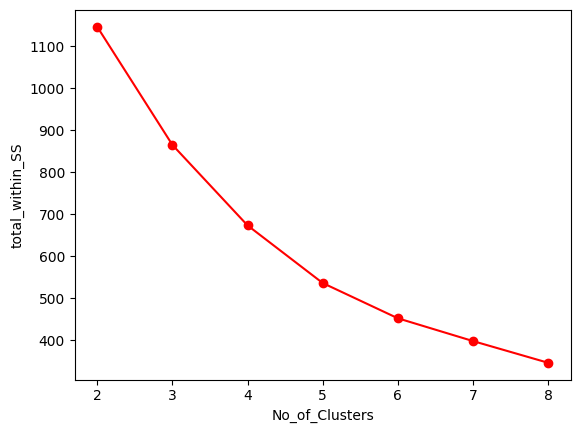

In [24]:
# Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [25]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters
model_kmeans = KMeans(n_clusters = 5)
model_kmeans.fit(air1_norm)

KMeans(n_clusters=5)

In [27]:
model_kmeans.labels_

array([4, 4, 4, ..., 3, 0, 0])

In [28]:
model_kmeans.labels_ # getting the labels of clusters assigned to each row
mb = pd.Series(model_kmeans.labels_) # converting numpy array into pandas series object
air['k_means_clust'] = mb # creating a new column and assigning it to new column

In [29]:
air.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters,k_means_clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1


In [30]:
sil_score= silhouette_score(air1_norm, model_kmeans.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.4166386993706997


In [31]:
air.groupby('k_means_clust').agg(['mean']).reset_index()

,k_means_clust,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3219.702070,35385.638164,94.610261,1.204320,1.017102,1.006301,4400.907291,6.941494,214.288029,0.598560,1983.927093,0.0,2.082808
1,1,1379.641509,118863.698113,200.866473,4.074020,1.001451,1.030479,49828.551524,20.862119,780.963716,2.364296,5260.162554,1.0,0.000000
2,2,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0,1.000000
3,3,2063.952020,78078.890152,274.411616,1.433081,1.027778,1.007576,10703.342172,11.363636,924.084596,2.804293,4072.556818,1.0,2.155303
4,4,1169.978009,49674.980324,90.319444,1.118056,1.017361,1.001157,3386.160880,6.824074,242.075231,0.719907,5570.855324,0.0,3.646991


# DBSCAN

In [32]:
from sklearn.cluster import DBSCAN

In [33]:
# Using data normalized by MinMaxScaler
dbscan = DBSCAN(eps=0.6, min_samples=12)
dbscan.fit(air1_norm)

DBSCAN(eps=0.6, min_samples=12)

In [34]:
#Noisy samples are given the label -1.
dbscan.labels_


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [35]:
# silhouette score
sil_score= silhouette_score(air1_norm, dbscan.labels_)
sil_score

0.4682009843113833

In [36]:
DB=pd.DataFrame(dbscan.labels_,columns=['DB_SCAN'])
DB

,DB_SCAN
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [37]:
clustered = pd.concat([air,DB],axis=1)
clustered

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters,k_means_clust,DB_SCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4,4,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4,4,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4,4,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4,4,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3,3,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3,3,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,0


In [38]:
clustered[clustered['DB_SCAN']==-1]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,hclusters,k_means_clust,DB_SCAN
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,3,3,-1
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,0,1,-1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,0,1,-1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,3,3,-1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,0,1,-1
2166,2183,100634,0,1,3,1,69669,28,1540,12,4193,1,3,3,-1
2364,2382,108081,0,5,1,5,217006,24,0,0,3567,1,0,1,-1
2840,2862,8557,0,1,1,1,200622,5,622,3,1955,1,3,3,-1
2955,2977,61474,0,1,1,4,47717,14,0,0,3354,0,1,0,-1
2999,3021,142527,1000,1,3,1,24091,47,4650,24,3206,1,3,3,-1


In [39]:
y=pd.DataFrame(dbscan.fit_predict(air1_norm),columns=['DB_SCAN'])
print(y['DB_SCAN'].value_counts())

 0    2516
 1    1471
-1      12
Name: DB_SCAN, dtype: int64


# Inferences